# Exercise 9
## Use scipy.fft to calculate the Discrete Fourier Transform of below function:
$$ f(x) = sin(2\pi(3/48)t)+2cos(2\pi(5/48)t)+3sin(2\pi(7/48)t)+cos(2\pi(7/48)t)+N(0,\sigma^2) $$


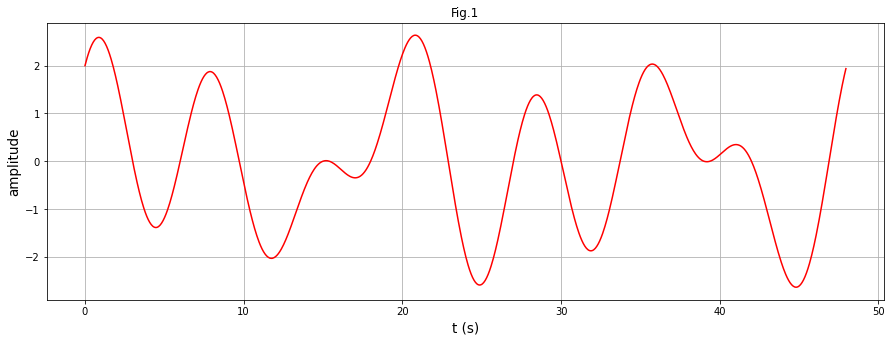

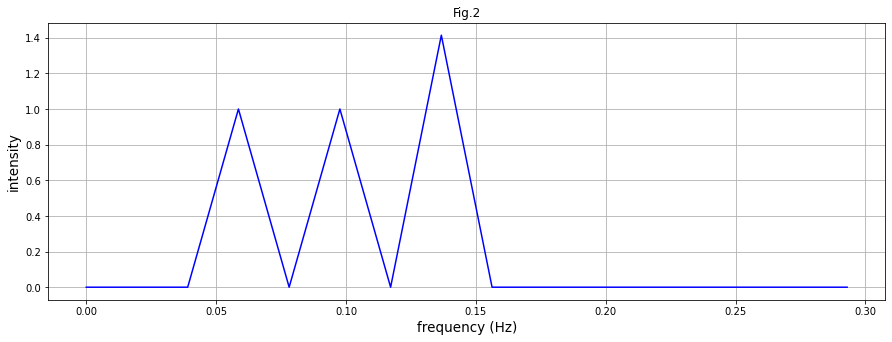

In [4]:
from scipy.fft import fft, ifft, fftfreq, ifft
import numpy as np
import matplotlib.pyplot as plt

n=1024
noise = np.random.normal(0,0.0001,n)
dt = 0.05
t = np.linspace(0, 48, n, endpoint=False)
y = np.sin(2*np.pi*(3/48)*t) + np.cos(2*np.pi*(5/48)*t) + np.sin(2*np.pi*(7/48)*t) + np.cos(2*np.pi*(7/48)*t) + noise


#original figure
plt.figure(figsize=(15,5), dpi=72)
plt.plot(t, y, linestyle='-', color='red')
plt.grid()
plt.xlabel('t (s)', fontsize=13.5)
plt.ylabel('amplitude', fontsize=13.5)
plt.title('Fig.1')
plt.show()


#figure after Fourier Transform
plt.figure(figsize=(15,5), dpi=72)
yf = fft(y)
xf = fftfreq(n, dt)
plt.plot(xf[:n//64], 2/n*np.abs(yf[:n//64]), linestyle='-', color='blue')
plt.grid()
plt.xlabel('frequency (Hz)', fontsize=13.5)
plt.ylabel('intensity', fontsize=13.5)
plt.title('Fig.2')
plt.show()


Use $ \textcolor{orange}{np.random.normal} $ to create a Gaussian noise with standard deriviation = 0.01. Figure 1 shows the original sigmal with added Gaussian noise, setting $ \Delta t $ = 0.05, $ \sigma $ = 0.01. 